In [86]:
import urls
import os
import sys

class FileReader(object):
    def __init__(self, filePath):
        self.filePath = filePath
    
    def read(self):
        with open(self.filePath, 'r', encoding="utf8") as f:
            s = f.read()
        return s

    def read_lines(self):
        with open(self.filePath, 'r', encoding="utf8") as f:
            stopwords = set([w.strip() for w in f.readlines()])
            return stopwords
fr = FileReader(urls.STOP_WORDS).read_lines()
print("ra" not in fr)

False


In [87]:
from pyvi import ViTokenizer, ViPosTagger
import numpy as np
import string
import re


class NLP(object):
    def __init__(self, text=None):
        self.text = text
        self.stopwords = FileReader(urls.STOP_WORDS).read_lines()
        self.newWords = []
        
    def remove_tags(self, raw_html):
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', raw_html )
        return cleantext

    def remove_links(self, text):
        text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        return text

    def remove_punctuation(self, text):
        return text.translate(str.maketrans('', '', string.punctuation))
        

    def remove_stopwords(self, words, stopwords):
        important_words = []
        for index in range(len(words)):
            if (words[index] not in stopwords ):
                important_words.append(words[index])
        return important_words
    
    def lower_sentences(self, text):
         return text.lower()

    def tokenize_sentences(self, text):
        return ViTokenizer.tokenize(text)

    def segment_word(self, tokens):
        return ViPosTagger.postagging(tokens)
    
    def remove_digits(self, tokens):
        new_words = []
        for index in range(len(tokens)):
            if not tokens[index].isdigit():
                new_words.append(tokens[index])
        return new_words

    def preprocessText(self, text):
        processed_text = text
        processed_text = self.remove_tags(processed_text)
        processed_text = self.lower_sentences(processed_text)
        processed_text = self.remove_links(processed_text)
        processed_text = self.remove_punctuation(processed_text)
        tokens = self.segment_word(self.tokenize_sentences(processed_text))
        important_tokens = self.remove_stopwords(tokens[0], self.stopwords)
        important_tokens = self.remove_digits(important_tokens)
        self.tokens = important_tokens
        return self.tokens

    def __repr__(self):
        return self.text





In [88]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#convert list to string and generate
class DataVisualizer(object):
    def __init__(self, tokens=None):
        self.tokens = tokens
    
    def get_word_cloud(self, tokens):
        unique_string=(" ").join(tokens)
        word_cloud = WordCloud(width = 1000, height = 500).generate(unique_string)
        return word_cloud
    
    def show_image(self, word_cloud):
        plt.figure(figsize=(15,8))
        plt.imshow(word_cloud)
        plt.axis("off")

    def save_fig(self, file_name):
        plt.savefig(file_name, bbox_inches='tight')
        plt.figure(figsize=(15,8))
        plt.show()
        plt.close()

    def count_tokens(self, tokens):
        unique, counts = np.unique(tokens, return_counts=True)
        return dict(zip(unique, counts))
    
    def process(self):
        # print(self.count_tokens(self.tokens))
        self.tokens = {k: v for k, v in self.count_tokens(self.tokens).items() if int(v) >= 3.0}
        print(self.tokens)
        self.word_cloud = self.get_word_cloud(self.tokens)
        self.show_image(self.word_cloud)

D:\Learning\Nam4_2\LTMNC\PythonCrawler\newscrawler\predict_category\raw_data\test\2dựántrọngđiểmởTPHCMthicôngxuyênTết.txt
{'chiều': 3, 'chui': 5, 'chục': 3, 'công_nhân': 8, 'công_trình': 9, 'công_trường': 5, 'công_việc': 3, 'cảnh': 5, 'cầu': 3, 'dự_án': 10, 'gia_đình': 3, 'giao_lộ': 3, 'giao_thông': 3, 'hai': 5, 'hcm': 4, 'hiện': 4, 'hoàn_thành': 5, 'hải': 3, 'hầm': 8, 'hở': 3, 'hữu': 10, 'kỹ_sư': 3, 'linh': 5, 'làm_việc': 3, 'm': 4, 'nam': 4, 'nguyễn': 18, 'nâng': 3, 'quê': 3, 'sài_gòn': 3, 'thi_công': 10, 'thoát': 3, 'thành_phố': 4, 'thọ': 5, 'tp': 4, 'trung_tâm': 3, 'tuyến': 4, 'tôn': 3, 'tết': 16, 'văn': 5, 'xe': 3, 'đoạn': 6, 'đón': 4, 'đường': 10, 'đầu_tư': 3, 'đẩy': 3, 'đức': 3}
D:\Learning\Nam4_2\LTMNC\PythonCrawler\newscrawler\predict_category\raw_data\test\2ngườiBắcNinh2ngườiGiaLaikhỏiCovid19.txt
{'bắc': 5, 'bệnh_nhân': 11, 'ca': 8, 'covid19': 10, 'dương_tính': 3, 'ghi_nhận': 4, 'gia': 7, 'hai': 5, 'huyện': 7, 'hải_dương': 4, 'lai': 10, 'ninh': 5, 'pa': 4, 'tại_gia': 3, 'tỉnh

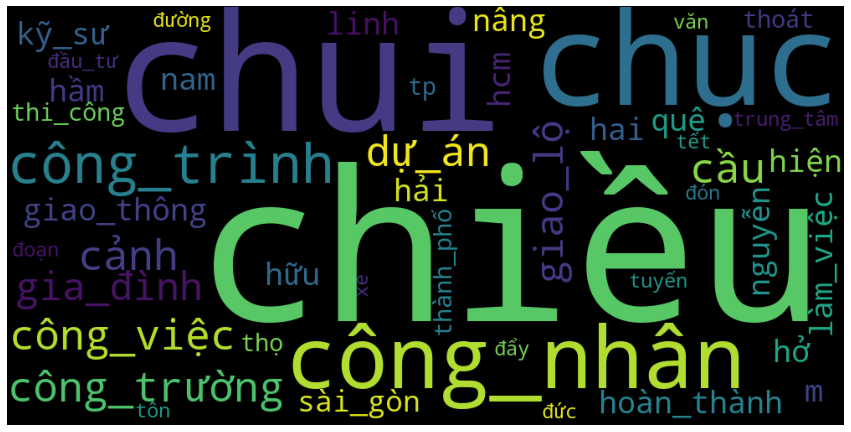

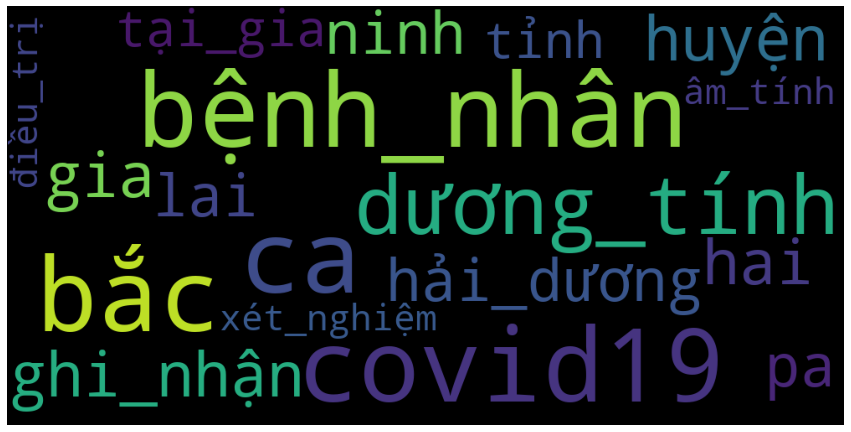

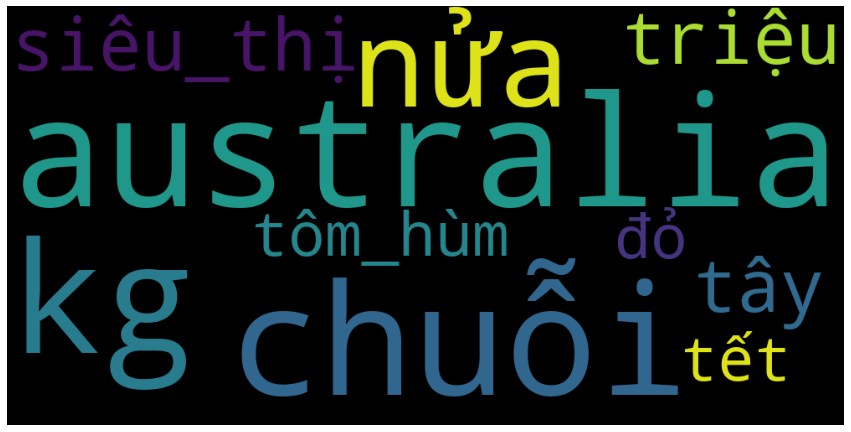

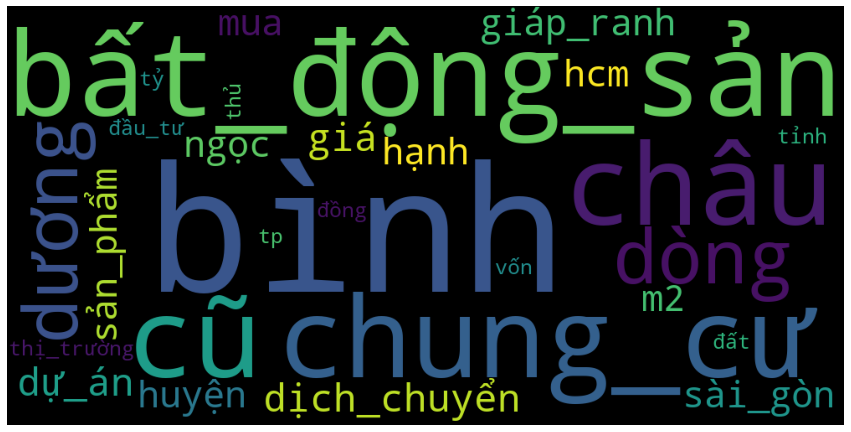

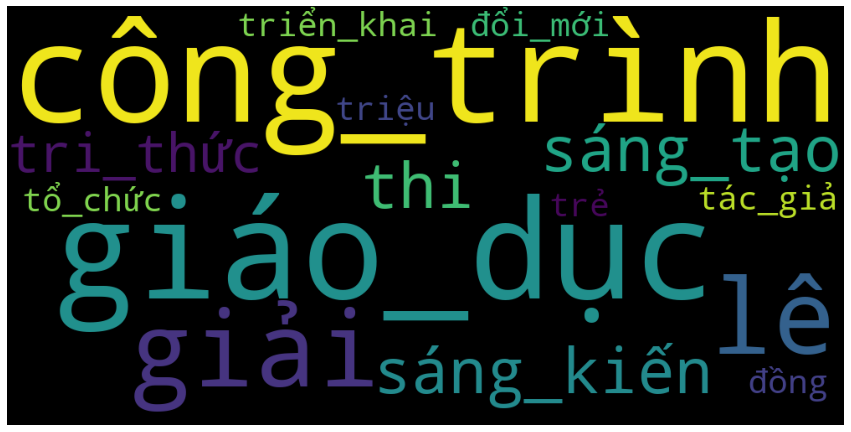

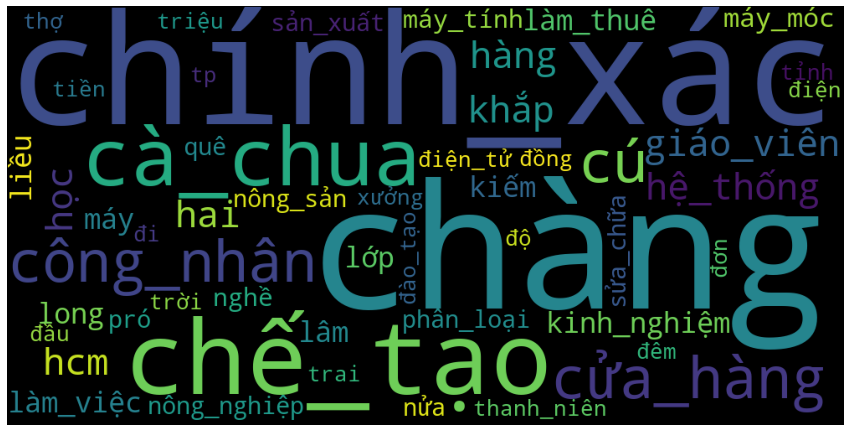

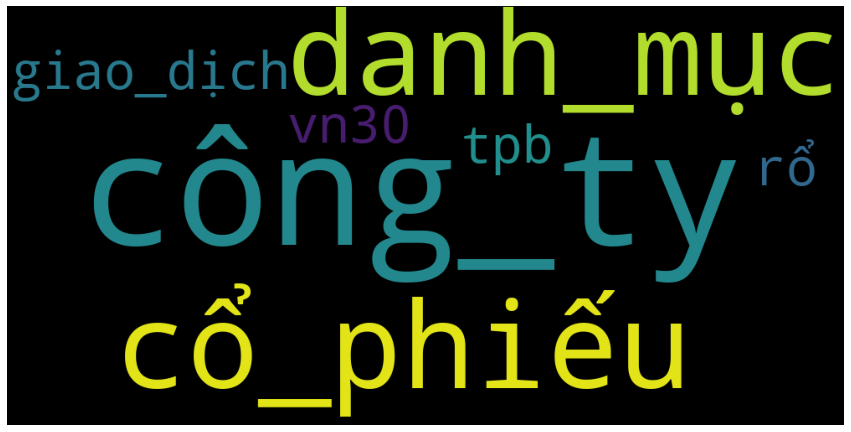

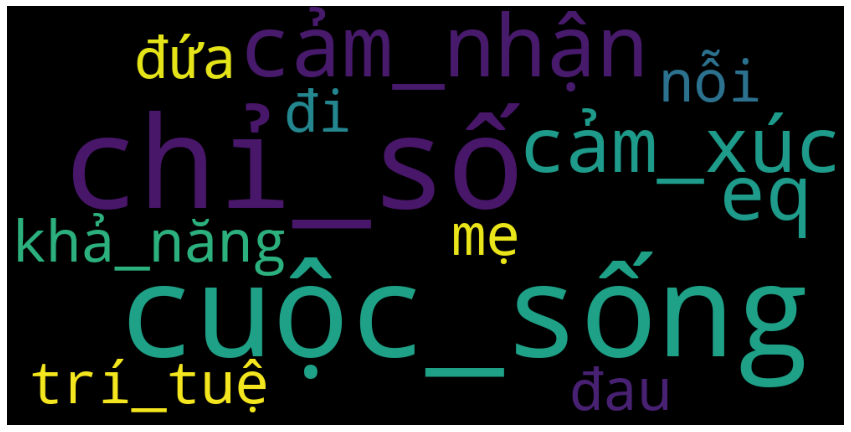

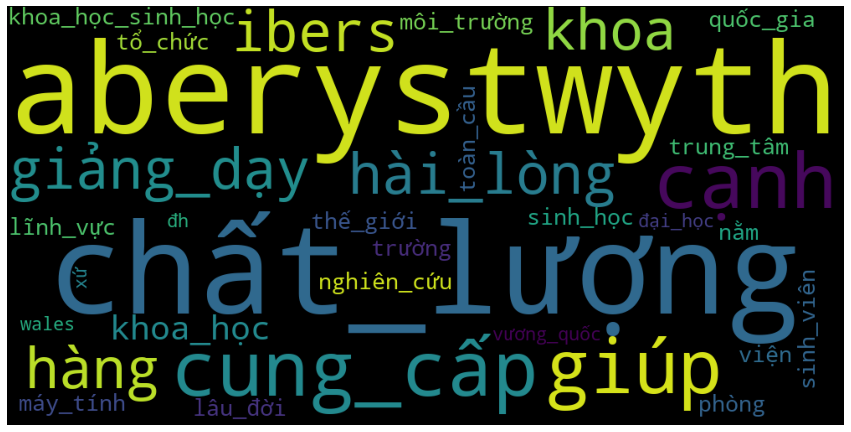

In [89]:


# Search all file in folder
for root, dirs, files in os.walk(urls.RAW_DATA_TEST_PATH):
    for file in files:
        ## Read all file in raw_data_test
        file_path = os.path.join(urls.RAW_DATA_TEST_PATH, file)
        print(file_path)
        exam_str = FileReader(file_path).read()
        

        nlp = NLP(text=exam_str)
        #Segment words
        tokens = nlp.preprocessText(exam_str)

        
        # Visualize words
        dv = DataVisualizer(tokens)
        # print(dv.count_tokens(tokens))
        dv.process()
        # dv.save_fig(file+".png")
        



